In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

Conclusions 
-Remove Airport_list
-trains_list correlated with subway_list 

In [2]:
data = pd.read_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_May_14.csv')

In [3]:
#Clean up data by removing missing values
data = data[data.airport_list >= 0]
data = data[data.price >=0]

In [4]:
data.describe()

,ID,latitude,location_data_accuracy,longitude,average_image_size,bedroom,cat,dog,image_number,price,...,square_footage,grocery_list,gym_list,movie_theatre_list,train_station_list,airport_list,subway_station_list,Barnes_and_Nobles_list,Deloitte_list,Starbucks_list
count,3.076000e+03,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076,3076,3076.000000,3076.000000,...,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076,3076.000000,3076.000000,3076.000000,3076.000000
mean,4.984234e+09,30.585578,0.730169,-60.651097,213120.936281,2.061118,0,0,9.697009,1944.017880,...,1207.502463,9.850130,6.728869,0.997399,2.015605,0,1.365735,0.157997,0.607607,3.244148
std,1.154868e+07,15.942676,3.457620,31.613972,110118.397497,1.234268,0,0,7.893017,796.599139,...,525.660362,8.209095,7.000438,1.644105,3.758535,0,2.900269,0.488307,1.271755,4.940414
min,4.959352e+09,0.000000,0.000000,-78.269000,0.000000,0.000000,0,0,0.000000,2.000000,...,20.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
25%,4.975371e+09,38.719200,0.000000,-77.121000,270000.000000,1.000000,0,0,3.000000,1500.000000,...,850.000000,1.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
50%,4.985626e+09,38.855283,0.000000,-77.059200,270000.000000,2.000000,0,0,8.000000,1795.000000,...,1207.502463,9.000000,4.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.000000
75%,4.995176e+09,38.919865,0.000000,-76.852868,270000.000000,3.000000,0,0,15.000000,2200.000000,...,1344.000000,19.000000,13.000000,2.000000,3.000000,0,2.000000,0.000000,1.000000,4.000000
max,5.001980e+09,39.355737,22.000000,0.000000,270000.000000,6.000000,0,0,24.000000,9851.000000,...,10000.000000,20.000000,20.000000,9.000000,20.000000,0,18.000000,3.000000,6.000000,20.000000


In [50]:
data.columns

Index([u'ID', u'city', u'country', u'latitude', u'location_data_accuracy', u'longitude', u'state', u'availability', u'average_image_size', u'bathroom', u'bedroom', u'cat', u'date_available', u'description', u'dog', u'housing_type', u'image_number', u'laundry', u'parking', u'price', u'smoking', u'square_footage', u'time_of_posting', u'url', u'grocery_list', u'gym_list', u'movie_theatre_list', u'train_station_list', u'airport_list', u'subway_station_list', u'Barnes_and_Nobles_list', u'Deloitte_list', u'Starbucks_list'], dtype='object')

In [80]:
def group_fields_by_price(field):
    print field
    if field == 'longitude':
        data[(data.longitude < -76.5) & (data.longitude > -78)].groupby('longitude')[['price']].mean().plot(figsize=(15, 2))
    elif field == 'latitude':
        data[(data.latitude > 36)].groupby('latitude')[['price']].mean().plot(figsize=(15, 2))  
    else:
        data.groupby(field)[['price']].mean().plot(figsize=(15, 2))

ID
city
country
latitude
location_data_accuracy
longitude
state
availability
average_image_size
bathroom
bedroom
cat
date_available
description
dog
housing_type
image_number
laundry
parking
price
smoking
square_footage
time_of_posting
url
grocery_list
gym_list
movie_theatre_list
train_station_list
airport_list
subway_station_list
Barnes_and_Nobles_list
Deloitte_list
Starbucks_list


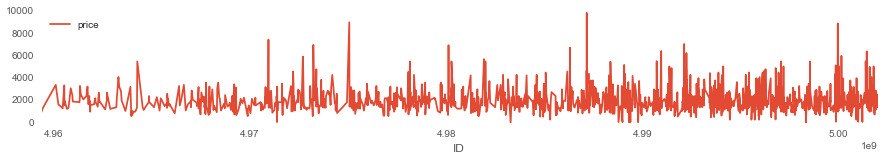

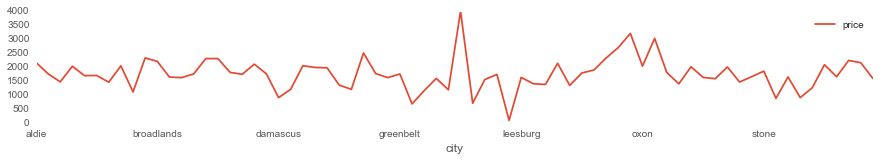

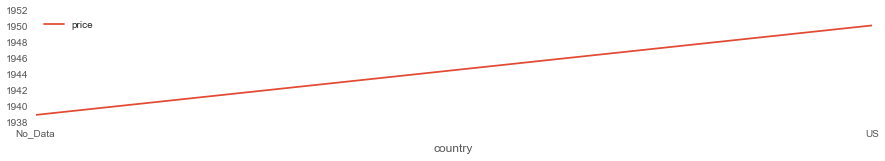

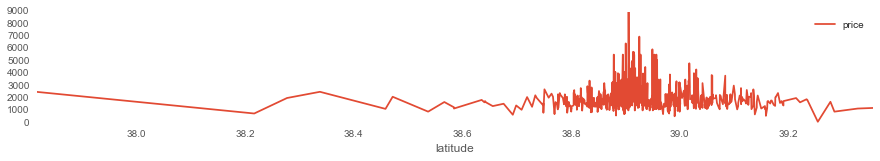

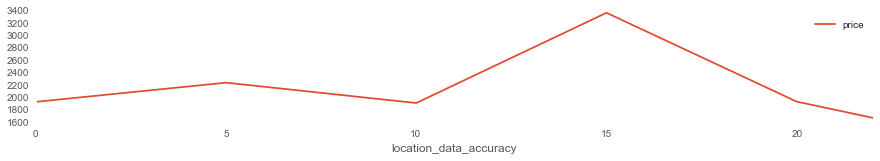

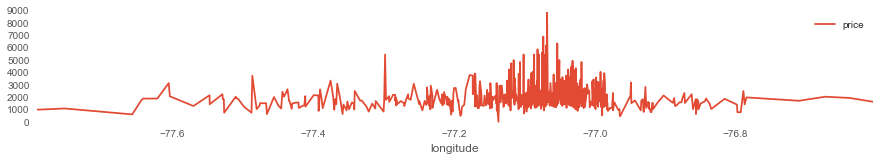

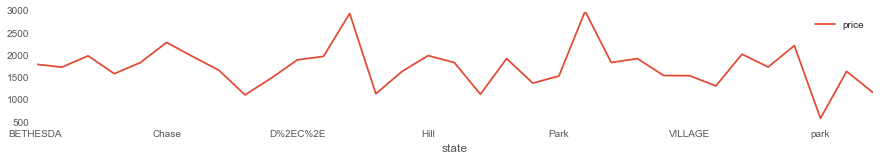

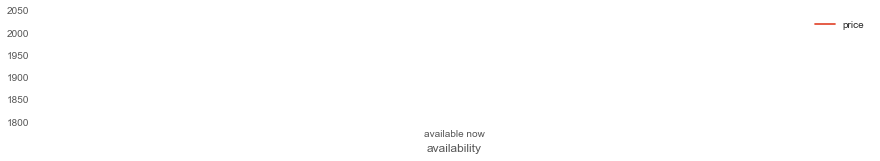

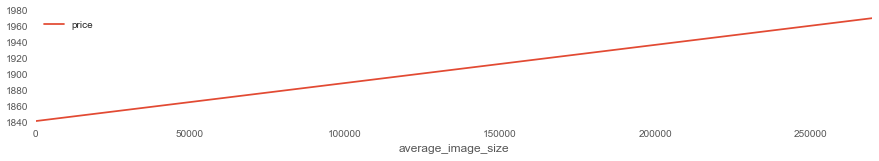

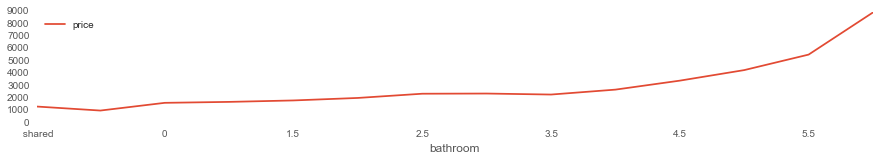

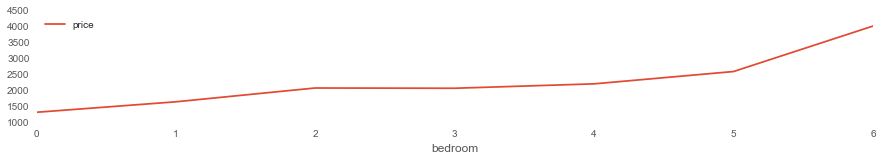

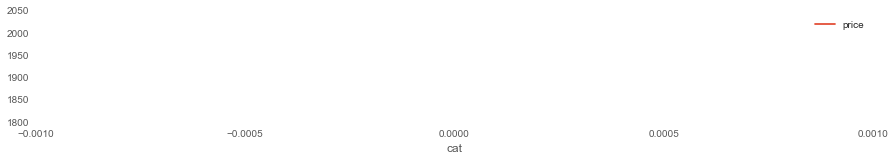

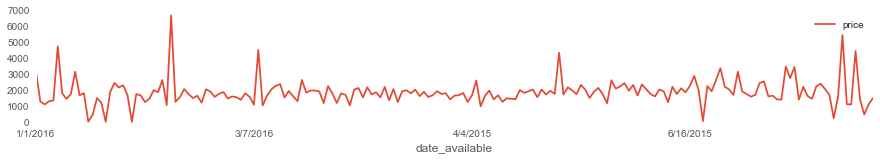

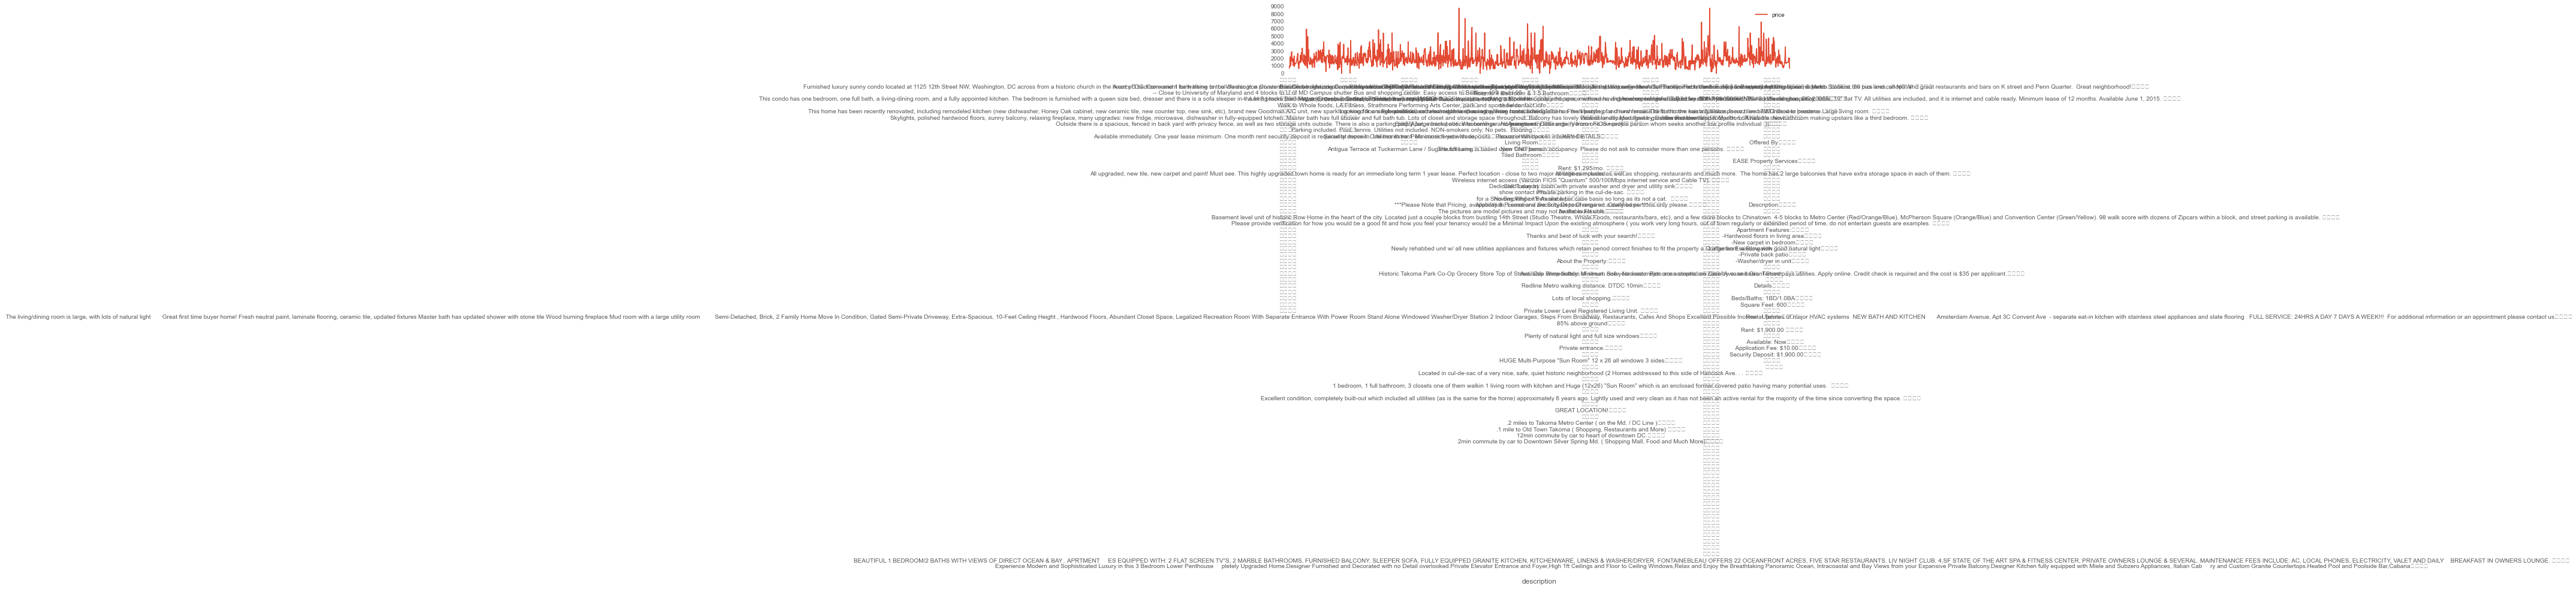

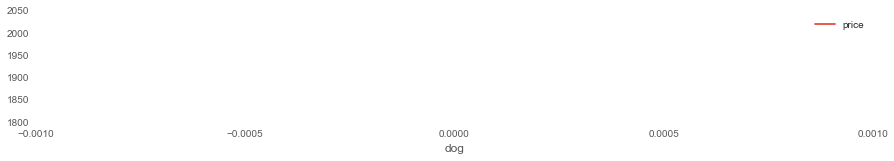

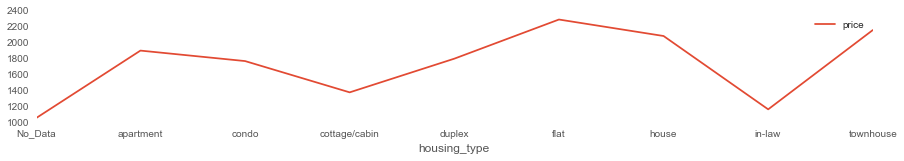

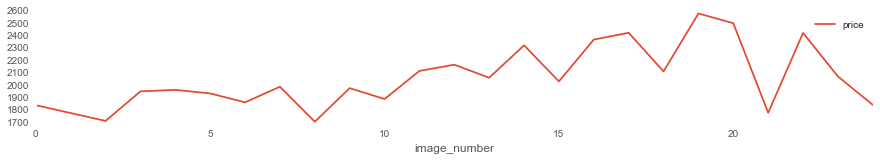

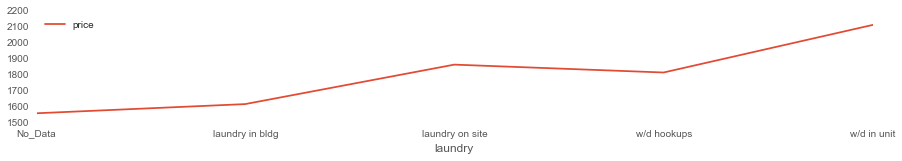

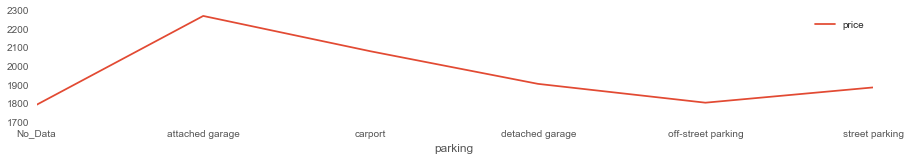

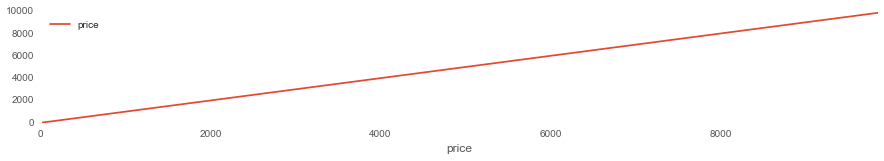

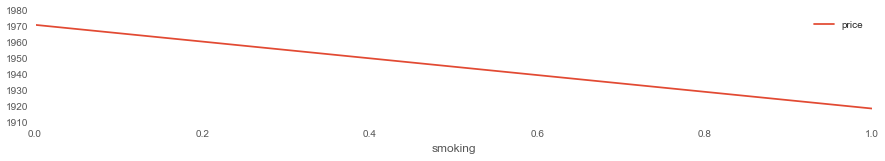

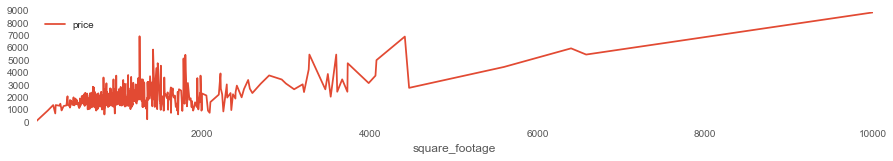

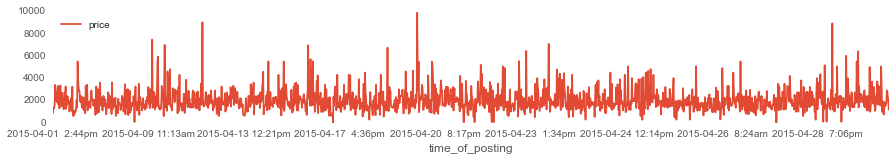

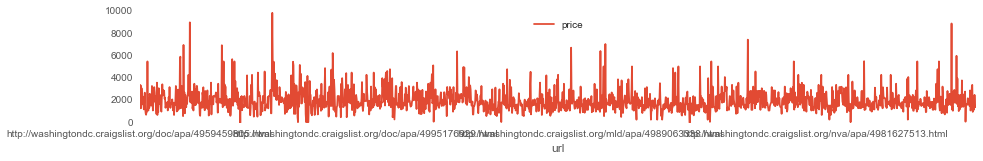

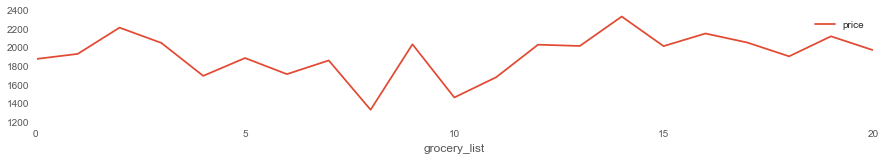

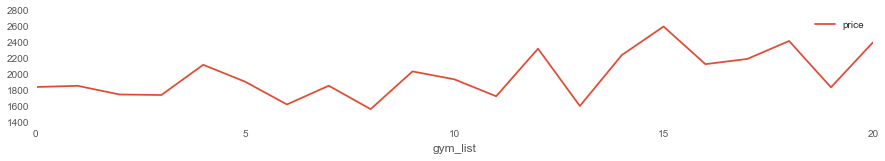

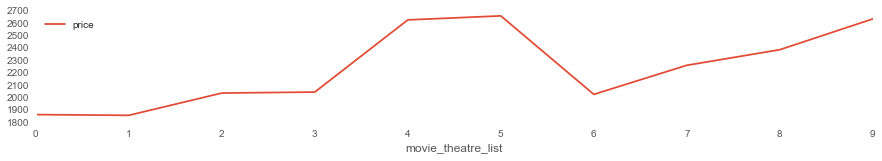

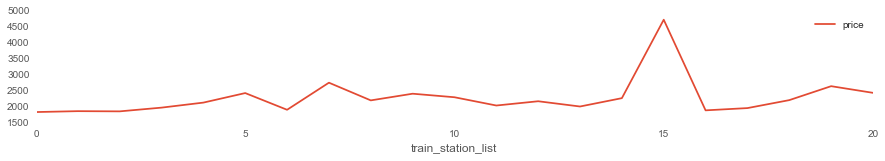

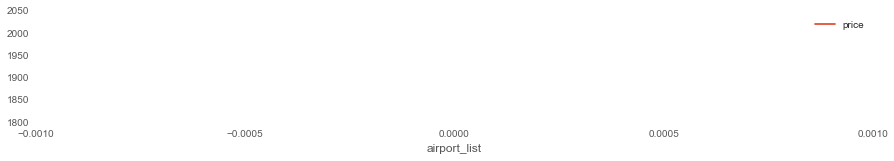

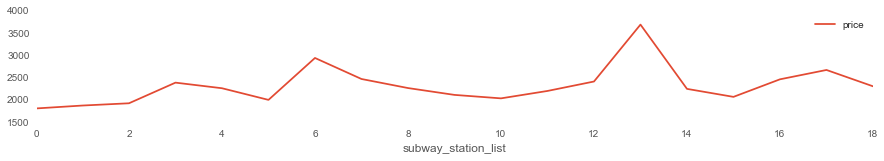

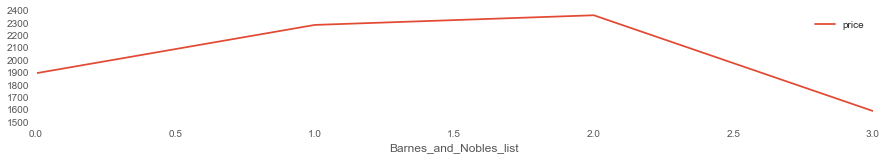

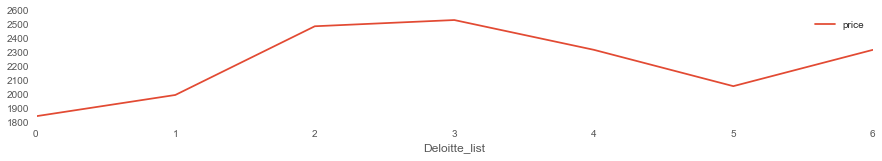

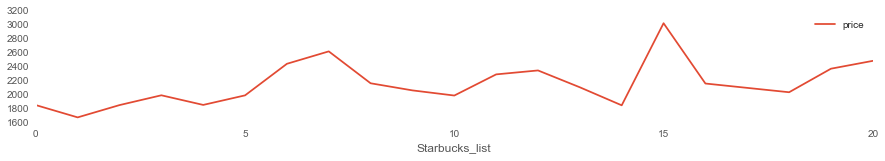

In [81]:
for field in data.columns:
    group_fields_by_price(field)

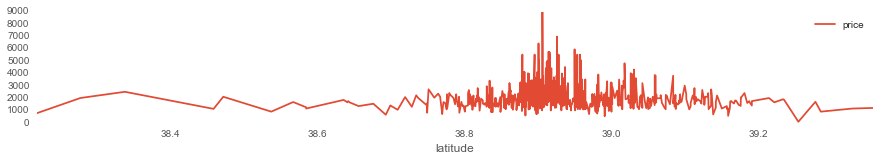

In [47]:
data[data.latitude > 38].groupby('latitude')[['price']].mean().plot(figsize=(15, 2))

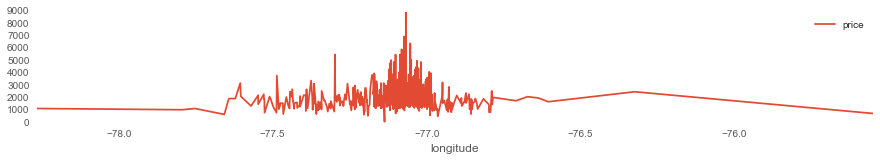

In [53]:
data[data.longitude < -75].groupby('longitude')[['price']].mean().plot(figsize=(15, 2))

In [ ]:
#Create heatmap of lat vs longitude

In [127]:
from pandas.tools.plotting import parallel_coordinates

parallel_coordinates(data[[u'subway_station_list',u'Barnes_and_Nobles_list',
                     u'Starbucks_list', u'smokings']], 'ID')

KeyError: 'ID'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000035BE9E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000039A8BB38>]], dtype=object)

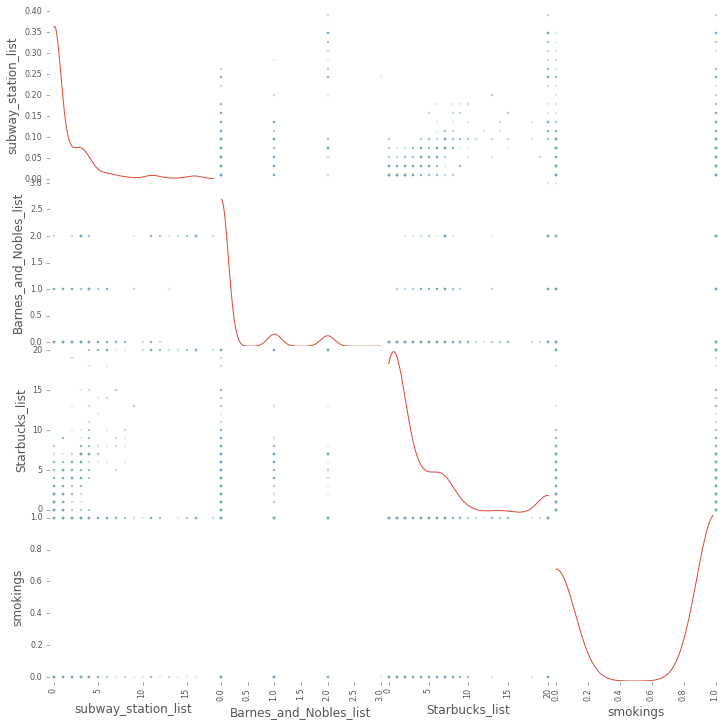

In [123]:
#data[[u'train_station_list',u'subway_station_list',u'Starbucks_list']].plot(kind='box', by='dog')
#data[[u'train_station_list',u'subway_station_list',u'Starbucks_list']].boxplot(by=data.cat)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[[u'subway_station_list',u'Barnes_and_Nobles_list',
                     u'Starbucks_list', u'smokings']], alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000044949DD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000004ACBA198>]], dtype=object)

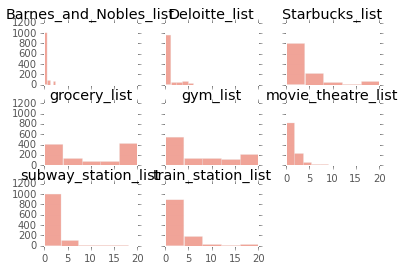

In [99]:
data[[u'grocery_list', u'gym_list', u'movie_theatre_list', u'train_station_list',
      u'subway_station_list', u'Barnes_and_Nobles_list', u'Deloitte_list',
      u'Starbucks_list']].hist(sharex=True, sharey=True, alpha=0.5, bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000439EC3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000042C7F6D8>]], dtype=object)

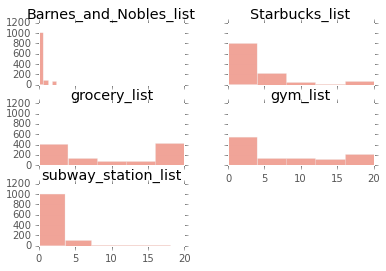

In [96]:
data[[u'grocery_list', u'gym_list',u'subway_station_list',
      u'Barnes_and_Nobles_list',u'Starbucks_list']].hist(sharex=True, sharey=True, alpha=0.5, bins=5)

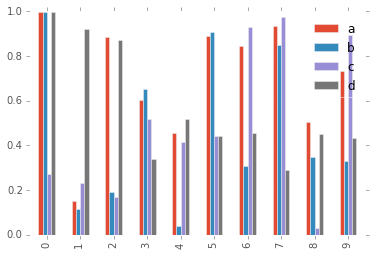

In [74]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot(kind='bar');

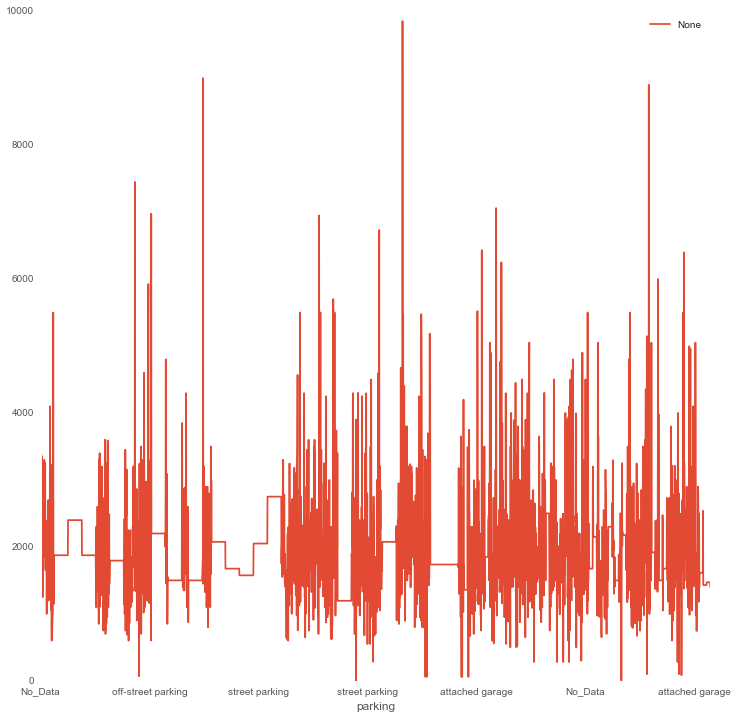

In [13]:
data.plot(x='parking', y='price', figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BDEE1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000020F37C88>]], dtype=object)

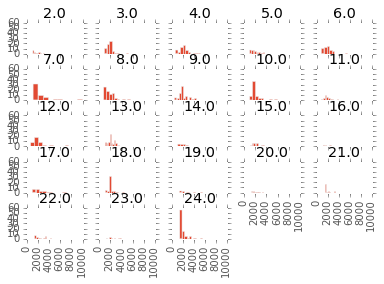

In [63]:
data[data.image_number>0].price.hist(by=data.image_number, sharex=True, sharey=True)

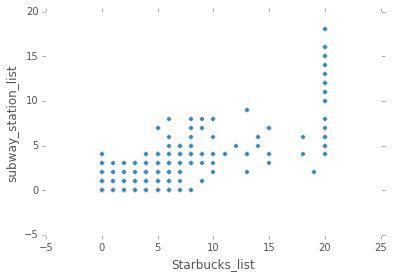

In [64]:
data.plot(kind='scatter', x='Starbucks_list', y='subway_station_list')

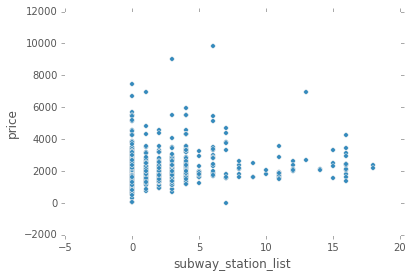

In [65]:
data.plot(kind='scatter', x='subway_station_list', y='price')

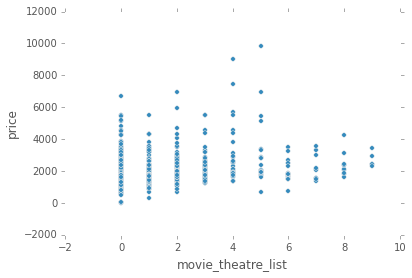

In [66]:
data.plot(kind='scatter', x='movie_theatre_list', y='price')

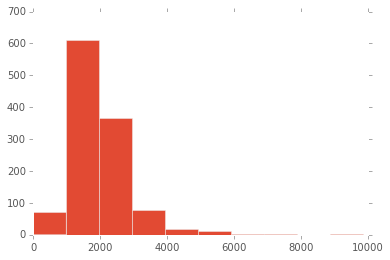

In [67]:
data.price.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010B18A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011381710>]], dtype=object)

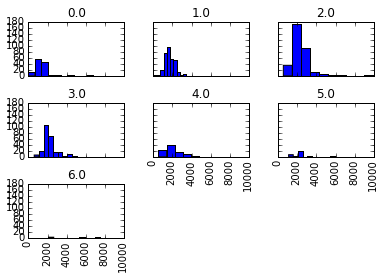

In [33]:
data.price.hist(by=data.bedroom, sharey=True, sharex=True)

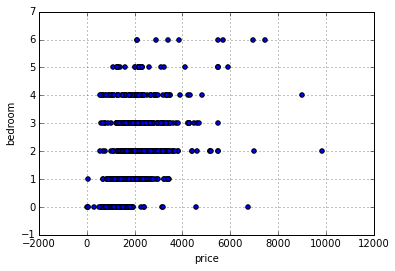

In [37]:
data.plot(kind='scatter', x='price', y='bedroom')

AttributeError: 'AxesSubplot' object has no attribute 'ndim'

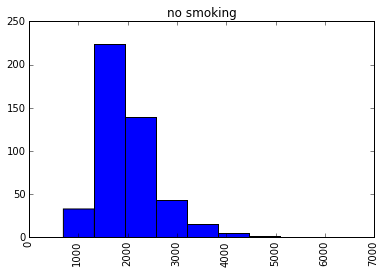

In [38]:
data.price.hist(by=data.smoking, sharex=True, sharey=True)

In [ ]:
data.plot(kind='scatter', x='price', y='average_image_size', alpha = 0.2)

In [ ]:
data.plot(kind='scatter', x='image_number', y='average_image_size', alpha = 0.2)

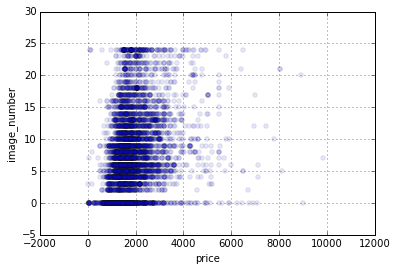

In [15]:
data.plot(kind='scatter', x='price', y='image_number', alpha=0.1)

In [ ]:
data.average_image_size.hist()

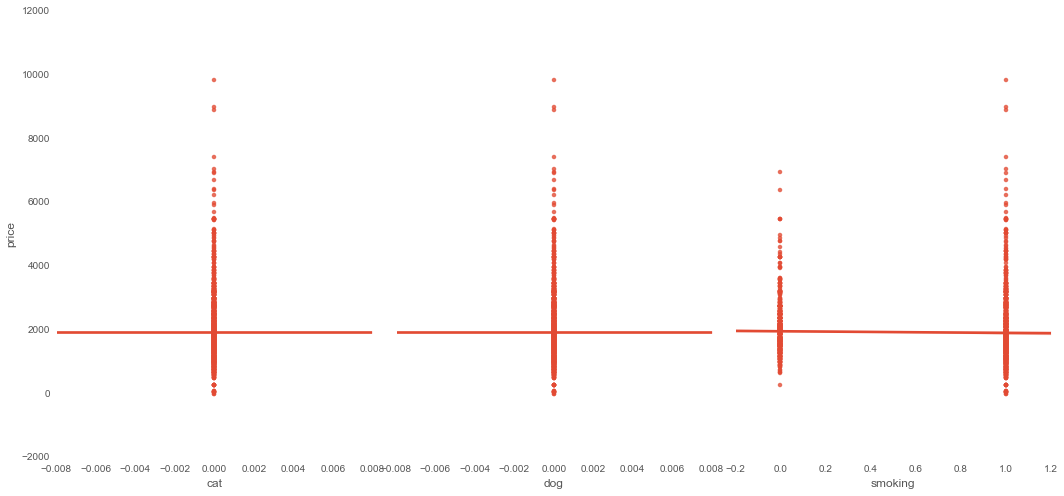

In [7]:
sns.pairplot(data, x_vars=['cat','dog','smoking'], y_vars='price', size=7, aspect=0.7, kind='reg')